# Question 2.
Build a machine learning model to predict whether a person makes over 50K a
year or not \
[https://drive.google.com/open?id=1XVi34snXnh6qW2u71jwc05oCRnpOXoWF]

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from collections import Counter
import math
%matplotlib inline

In [2]:
# Reading in the data
try:
    df = pd.read_csv("classification_2.csv")
except Exception as e:
    print(f"Error : {e}")

## Data Analysis

Understanding the data before processing and fitting the model

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
39,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
77516,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
13,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
2174,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
0,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
40,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [4]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.nunique()

39                   73
 State-gov            9
 77516            21647
 Bachelors           16
 13                  16
 Never-married        7
 Adm-clerical        15
 Not-in-family        6
 White                5
 Male                 2
 2174               119
 0                   92
 40                  94
 United-States       42
 <=50K                2
dtype: int64

In [6]:
df.isna().any()     # Checking for any missing values in the data

39                False
 State-gov        False
 77516            False
 Bachelors        False
 13               False
 Never-married    False
 Adm-clerical     False
 Not-in-family    False
 White            False
 Male             False
 2174             False
 0                False
 40               False
 United-States    False
 <=50K            False
dtype: bool

In [7]:
df.isnull().sum()   # Checking for any null values in the data

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [8]:
df.dtypes       # Understanding type of values in the data

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

## Data Preprocessing

In [9]:
df.shape

(32560, 15)

In [10]:
df.sample(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
9710,48,Private,102938,Bachelors,13,Never-married,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,Vietnam,<=50K
8268,62,Local-gov,159908,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,1258,38,United-States,<=50K
2313,40,Private,29841,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
28960,37,?,50862,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,55,United-States,<=50K
14148,37,Private,126675,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
22857,37,Local-gov,48976,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,4865,0,45,United-States,<=50K
4080,27,Private,169631,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,<=50K
18407,47,Self-emp-inc,181130,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,50,United-States,>50K
26262,38,Private,32897,11th,7,Divorced,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K
17573,76,Private,278938,Bachelors,13,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,20,United-States,<=50K


In [11]:
df.columns = df.columns.str.strip()     # We are removing/stripping spaces in the column headers

In [12]:
df.rename(columns={'<=50K':'y'}, inplace=True)

In [13]:
df.sample(4)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,y
2365,33,Private,107248,Assoc-voc,11,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,45,United-States,<=50K
5501,28,Private,96337,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
7314,26,Private,303973,HS-grad,9,Never-married,Priv-house-serv,Other-relative,White,Female,0,1602,15,Mexico,<=50K
4025,20,Private,34706,Some-college,10,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,47,United-States,<=50K


In [14]:
# sn.swarmplot(df)

Removing the columns which have less effect on the outcome to maximize the accuracy of the model 

In [15]:
df = df.drop(['Never-married', 'Bachelors','Adm-clerical', 'Not-in-family', 'White', 'United-States', 'Male'], axis=1)

In [16]:
df.info

<bound method DataFrame.info of        39          State-gov   77516  13   2174  0  40       y
0      50   Self-emp-not-inc   83311  13      0  0  13   <=50K
1      38            Private  215646   9      0  0  40   <=50K
2      53            Private  234721   7      0  0  40   <=50K
3      28            Private  338409  13      0  0  40   <=50K
4      37            Private  284582  14      0  0  40   <=50K
...    ..                ...     ...  ..    ... ..  ..     ...
32555  27            Private  257302  12      0  0  38   <=50K
32556  40            Private  154374   9      0  0  40    >50K
32557  58            Private  151910   9      0  0  40   <=50K
32558  22            Private  201490   9      0  0  20   <=50K
32559  52       Self-emp-inc  287927   9  15024  0  40    >50K

[32560 rows x 8 columns]>

In [17]:
df.y = df.y.str.strip()

In [18]:
df.head(10)

,39,State-gov,77516,13,2174,0,40,y
0,50,Self-emp-not-inc,83311,13,0,0,13,<=50K
1,38,Private,215646,9,0,0,40,<=50K
2,53,Private,234721,7,0,0,40,<=50K
3,28,Private,338409,13,0,0,40,<=50K
4,37,Private,284582,14,0,0,40,<=50K
5,49,Private,160187,5,0,0,16,<=50K
6,52,Self-emp-not-inc,209642,9,0,0,45,>50K
7,31,Private,45781,14,14084,0,50,>50K
8,42,Private,159449,13,5178,0,40,>50K
9,37,Private,280464,10,0,0,80,>50K


> pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [19]:
df = pd.concat((df, pd.get_dummies(df['State-gov'])),1)
df = df.drop(['State-gov'],axis=1)

C:\Users\zeesh\AppData\Local\Temp\ipykernel_27228\2775472956.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat((df, pd.get_dummies(df['State-gov'])),1)


In [20]:
df.head()

,39,77516,13,2174,0,40,y,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,50,83311,13,0,0,13,<=50K,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,<=50K,0,0,0,0,1,0,0,0,0
2,53,234721,7,0,0,40,<=50K,0,0,0,0,1,0,0,0,0
3,28,338409,13,0,0,40,<=50K,0,0,0,0,1,0,0,0,0
4,37,284582,14,0,0,40,<=50K,0,0,0,0,1,0,0,0,0


In [21]:
df.y = df.y.replace({'<=50K': 0, '>50K': 1})   # Replacing categories with numerical equivalent

In [22]:
df.sample(5)

,39,77516,13,2174,0,40,y,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
23835,54,261207,4,0,0,45,0,0,0,0,0,0,0,1,0,0
8270,45,180309,10,0,0,40,0,0,0,0,0,1,0,0,0,0
5080,37,163392,9,0,0,40,0,0,0,0,0,1,0,0,0,0
17489,69,124930,3,0,2267,40,0,0,0,0,0,1,0,0,0,0
16104,32,177216,13,0,0,40,0,0,0,0,0,0,0,0,1,0


In [23]:
# sn.pairplot(data=df, diag_kind='kde')

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
39,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
77516,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
13,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
2174,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
0,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
40,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0
y,32560.0,0.240817,0.427586,0.0,0.0,0.0,0.0,1.0
?,32560.0,0.056388,0.230673,0.0,0.0,0.0,0.0,1.0
Federal-gov,32560.0,0.029484,0.169161,0.0,0.0,0.0,0.0,1.0
Local-gov,32560.0,0.064281,0.245257,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

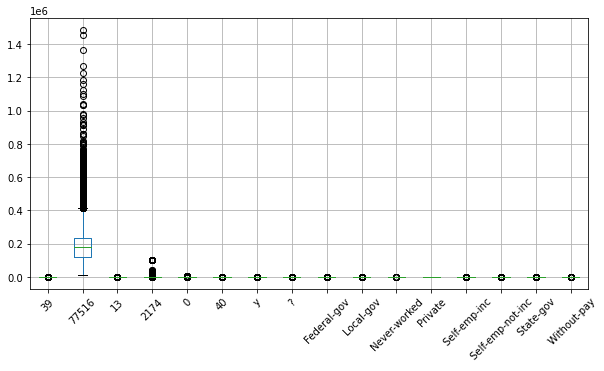

In [25]:
df.boxplot(rot=45, figsize=(10,5))

In [26]:
df.shape

(32560, 16)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   39                 32560 non-null  int64
 1   77516              32560 non-null  int64
 2   13                 32560 non-null  int64
 3   2174               32560 non-null  int64
 4   0                  32560 non-null  int64
 5   40                 32560 non-null  int64
 6   y                  32560 non-null  int64
 7    ?                 32560 non-null  uint8
 8    Federal-gov       32560 non-null  uint8
 9    Local-gov         32560 non-null  uint8
 10   Never-worked      32560 non-null  uint8
 11   Private           32560 non-null  uint8
 12   Self-emp-inc      32560 non-null  uint8
 13   Self-emp-not-inc  32560 non-null  uint8
 14   State-gov         32560 non-null  uint8
 15   Without-pay       32560 non-null  uint8
dtypes: int64(7), uint8(9)
memory usage: 2.0 MB


In [28]:
df.skew()   # Checking for skewness before feature scaling

39                    0.558738
77516                 1.446972
13                   -0.311630
2174                 11.953690
0                     4.594549
40                    0.227636
y                     1.212383
 ?                    3.846469
 Federal-gov          5.563263
 Local-gov            3.553376
 Never-worked        68.182528
 Private             -0.857656
 Self-emp-inc         5.119915
 Self-emp-not-inc     3.146333
 State-gov            4.706125
 Without-pay         48.196771
dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Remove the outlier from the whole dataset
def remove_outlier(data):
    quant_df = data.quantile([0.20, 0.80])
    for name in list(data.columns): data = data[(data[name] > quant_df.loc[0.20, name]) & (data[name] < quant_df.loc[0.80, name])]
    return data

In [31]:
df

,39,77516,13,2174,0,40,y,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,50,83311,13,0,0,13,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,0,1,0,0,0,0
2,53,234721,7,0,0,40,0,0,0,0,0,1,0,0,0,0
3,28,338409,13,0,0,40,0,0,0,0,0,1,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0,0,0,0,0,1,0,0,0,0
32556,40,154374,9,0,0,40,1,0,0,0,0,1,0,0,0,0
32557,58,151910,9,0,0,40,0,0,0,0,0,1,0,0,0,0
32558,22,201490,9,0,0,20,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

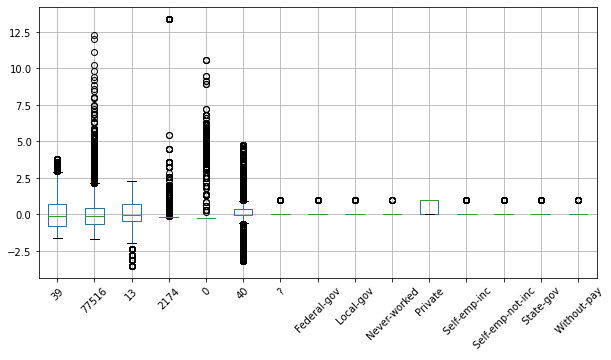

In [54]:
data.boxplot(rot=45, figsize=(10,5))

In [32]:
data = remove_outlier(df)  # removing outliers from data 

### Train/Test Split and Feature Scaling

In [33]:
y_values = df['y']  # taking out the y values from the dataset

In [34]:
data = df.drop('y', axis = 1)   # taking out the y values from the dataset

In [35]:
def feature_scaling(dataframe,column):
    """
    
    Args:
        dataframe (_type_): _description_
        column (_type_): _description_

    Returns:
        _type_: _description_
    """
    dataframe[column] = np.divide(np.subtract(dataframe[column],dataframe[column].mean()),
                                  dataframe[column].std())
    return dataframe[column]

In [36]:
column = ['77516','2174','13','39','40','0']
for item in column:
    data[item] = data[item].astype(float)
for item in column:
    data[item] = feature_scaling(data,item)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, y_values, test_size = 0.2)    # We are splitting the data into training and testing sets in 70:30 ratio

### Sigmoid Function

In [38]:
def sigmoid(x):
    """
    Compute the sigmoid of x
    Arguments:
    x -- A scalar or numpy array of any size
    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [39]:
np.random.seed(1) # set a seed so that the results are consistent

Arguments: \
X -- input dataset of shape (input size, number of examples) \
Y -- labels of shape (output size, number of examples)

In [40]:
def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 4     # the size of the hidden layer
    n_y = 1# size of output layer
    return (n_x, n_h, n_y)

The below function creates a vector of zeros w and initializes b to 0.

In [41]:
# initialize_parameters
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)* 0.01
    b2 = np.zeros((n_y,1))
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

In [42]:
# X_train, X_test, y_train, y_test
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Implement the cost function and its gradient for the propagation

In [43]:
def forward_propagation(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    assert(A2.shape == (1, X.shape[1]))
    cache = {"Z1": Z1,
    "A1": A1,
    "Z2": Z2,
    "A2": A2}
    return A2, cache

In [44]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[0] # number of example
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
    cost = - np.sum(logprobs)/m
    # use directly np.dot())
    # cost=-(np.dot(Y,np.log(A2.T))+np.dot(np.log(1-A2),(1-Y).T))/m
    cost = np.squeeze(cost) # makes sure cost is the dimension we expect.
    # E.g., turns [[17]] into 17
    return cost

This function optimizes w and b by running a gradient descent algorithm

In [45]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2-Y
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

In [46]:
def update_parameters(parameters, grads, learning_rate = 0.000001):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    # Update rule for each parameter
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    parameters = {"W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2}
    return parameters

Builds the logistic regression model by calling the functions we have developed above

In [47]:
def nn_model(X, Y, n_h, num_iterations = 5000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs:"n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # Loop (gradient descent)
    for i in range(0, num_iterations):
    # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
    return parameters

Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

In [48]:
#  Prediction Function
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    """
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    return predictions

In [49]:
X_train_T = X_train.T
X_test_1 = X_test.T
# y_train_1 = y_train.T
# y_test_1 = y_test.T

## Training

In [50]:
# X_train, X_test, y_train, y_test
try:
    parameter_values = nn_model(X_train_T, y_train, n_h = 4, num_iterations = 5000, print_cost=True)
except Exception as e:
    print("The error is :",e)

Cost after iteration 0: 0.693136
Cost after iteration 1000: 0.693069
Cost after iteration 2000: 0.693003
Cost after iteration 3000: 0.692937
Cost after iteration 4000: 0.692870


In [51]:
predictions1 = predict(parameter_values, X_train_T)
print('Train data Accuracy: %d' % float((np.dot(y_train,predictions1.T) + np.dot(1-y_train,1-predictions1.T))/float(y_train.size)*100) + '%')

Train data Accuracy: 75%


In [52]:
predictions2 = predict(parameter_values, X_test_1)
print('Test data Accuracy: %d' % float((np.dot(y_test,predictions2.T) + np.dot(1-y_test,1-predictions2.T))/float(y_test.size)*100) + '%')

Test data Accuracy: 76%
